## Import necessary libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

### MNIST dataset 

In [24]:
# import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

y_test[:5]

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


array([7, 2, 1, 0, 4], dtype=uint8)

### Data visualization 

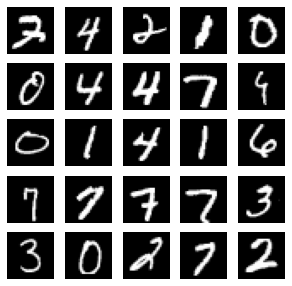

In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

### Designing model architecture using Keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

#### One-hot representation

In [26]:
# convert to one-hot vector
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)
y_test.shape

(10000, 10)

### Data reshape and normalization

In [27]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

### Setting network parameters 

In [28]:
batch_size = 128
hidden_units = 256

In [29]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units))
model.add(Activation('sigmoid'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
________________________________________________

### Compile the model with compile() method 

In [30]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

### Training the model...

In [31]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.8461
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2246 - accuracy: 0.9330
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1683 - accuracy: 0.9503
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1315 - accuracy: 0.9607
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1036 - accuracy: 0.9688
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.9747
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0690 - accuracy: 0.9789
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0564 - accuracy: 0.9833
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0467 - accuracy: 0.9858
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0392 - accuracy: 0.9885

### Evaluating model performance

In [32]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 870us/step - loss: 0.0814 - accuracy: 0.9790

Test accuracy: 97.9%
